In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn=sqlite3.connect('../output/education_life_expectancy.db')
panel=pd.read_sql_query('SELECT * FROM panel', conn)

panel.head()


,Country,Year,LifeExp_Both,Enroll_Primary,Enroll_Secondary,Enroll_Tertiary,EduExp_GDP,EduExp_Total
0,Afghanistan,2014,62.2599,6217756.0,2602734.0,262874.0,4.80435,18.39787
1,Afghanistan,2011,61.2503,5291624.0,2208963.0,97504.0,4.08791,19.10585
2,Albania,2013,77.9951,198897.0,346365.0,173029.0,3.53800,12.12391
3,Albania,2007,77.6907,210125.0,410444.0,86863.0,3.26868,11.17719
4,Albania,2006,76.9943,222402.0,408980.0,74747.0,3.15719,10.93295


In [4]:
print(panel.describe())
print(panel['Year'].min(), panel['Year'].max())

              Year  LifeExp_Both  Enroll_Primary  Enroll_Secondary  \
count  1087.000000   1087.000000    1.087000e+03      1.087000e+03   
mean   2006.071757     71.604434    3.314787e+06      2.635232e+06   
std       4.190492      8.465609    1.088142e+07      8.393204e+06   
min    1999.000000     14.665500    1.563000e+03      1.901000e+03   
25%    2002.000000     67.438500    2.549675e+05      2.439270e+05   
50%    2006.000000     73.341300    6.625130e+05      6.038340e+05   
75%    2010.000000     78.471300    2.726180e+06      2.187786e+06   
max    2014.000000     85.009900    1.398699e+08      1.191482e+08   

       Enroll_Tertiary   EduExp_GDP  EduExp_Total  
count     1.087000e+03  1087.000000   1087.000000  
mean      9.075992e+05     4.705195     14.712729  
std       2.509487e+06     1.749249      4.828712  
min       0.000000e+00     1.195280      5.071700  
25%       4.234950e+04     3.508435     11.194150  
50%       1.920220e+05     4.622390     13.923230  
75%  

Here we try to figure out if life expectancy has increased over time?

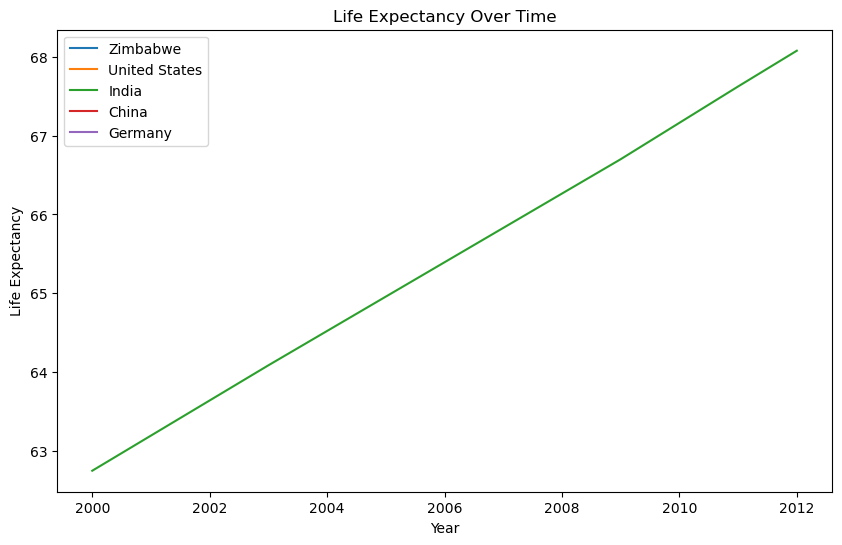

In [5]:
countries = ['Zimbabwe', 'United States', 'India', 'China', 'Germany']

plt.figure(figsize=(10,6))
for c in countries:
    data=panel[panel['Country'] == c]
    plt.plot(data['Year'], data['LifeExp_Both'], label=c)

plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Time')
plt.legend()
plt.show()

In [6]:
# lets try to see if we even have those countries in our panel dataset
for c in countries:
    n=panel[panel['Country'] == c].shape[0]
    print(c,n)

Zimbabwe 0
United States 0
India 6
China 0
Germany 0


In [7]:
#that means there is only India there, so lets see the unique columns there

panel['Country'].unique()[0:100]

array(['Afghanistan', 'Albania', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'Colombia', 'Congo', 'Costa Rica', 'Croatia',
       'Cyprus', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Latvia', 'Lebanon'

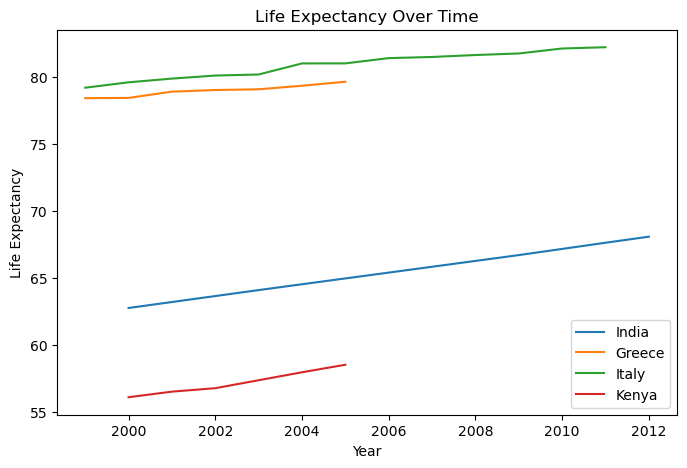

In [12]:
# so we will plot the EDA graphs for the countries that we DO have in our panel table
import matplotlib.pyplot as plt
countries = ['India', 'Greece','Italy','Kenya']

plt.figure(figsize=(8,5))
for c in countries:
    d=panel[panel['Country'] == c].sort_values('Year')
    plt.plot(d['Year'], d['LifeExp_Both'], label=c)

plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Time')
plt.legend()    
plt.show()

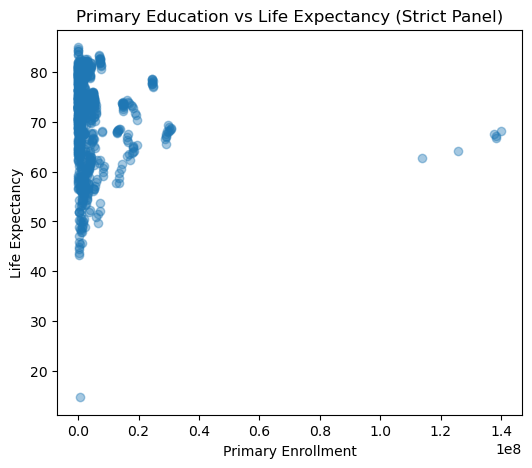

In [13]:
plt.figure(figsize=(6,5))
plt.scatter(panel["Enroll_Primary"], panel["LifeExp_Both"], alpha=0.4)
plt.xlabel("Primary Enrollment")
plt.ylabel("Life Expectancy")
plt.title("Primary Education vs Life Expectancy (Strict Panel)")
plt.show()


In [ ]:
# plotting these graphs should that there is a positive correlation between primary enrollment and life expectancy, which is consistent with the idea that better education can lead to improved health outcomes and longer life expectancy.
# but the differences are not that stark, as the years are also not that many.